In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 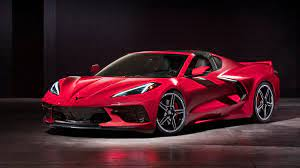

# Car or Not

In [2]:
import cv2
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image

In [4]:
img = image.load_img("../input/car-image-classification/New folder (8)/carimage/Image_1.jpg")
plt.imshow(img)

In [5]:
cv2.imread('../input/car-image-classification/New folder (8)/carimage/Image_1.jpg').shape

In [6]:
train = ImageDataGenerator(rescale=1/255)

In [7]:
train_dataset = train.flow_from_directory('../input/car-image-classification/New folder (8)',target_size=(200,200),batch_size=3, class_mode = 'binary')

In [8]:
train_dataset.class_indices

In [9]:
train_dataset.classes

# Train Cnn Model

In [10]:
 from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
            Conv2D(16, (3,3), activation='relu', input_shape=(200,200,3)),
            MaxPool2D((2,2)),
            Conv2D(32, (3,3), activation='relu'),
            MaxPool2D((2,2)),
            Conv2D(64, (3,3), activation='relu'),
            MaxPool2D((2,2)),
            Flatten(),
            Dense(512, activation='relu'),
            Dense(1, activation='sigmoid')
]) 

In [11]:
model.compile(optimizer=RMSprop(learning_rate = 0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(train_dataset, epochs=10)

In [13]:
img = cv2.imread("../input/car-image-classification/New folder (8)/notcar/download (6).jpg")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])
classes = model.predict(img)
print(classes)

In [14]:
img = cv2.imread("../input/car-image-classification/New folder (8)/notcar/download (6).jpg")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])
classes = model.predict(img)
print(classes)
if classes==0:
    print("Car")
else:
    print("Not Car")

In [15]:
img = cv2.imread("../input/car-image-classification/New folder (8)/carimage/Image_10.jpg")
plt.imshow(img)
plt.show()
img = cv2.resize(img,(200,200))
img = np.reshape(img,[1,200,200,3])
classes = model.predict(img)
print(classes)
if classes==0:
    print("Car")
else:
    print("Not Car")

In [20]:
def geturl():
    im = input()
    img = cv2.imread(im)
    plt.imshow(img)
    plt.show()
    img = cv2.resize(img,(200,200))
    img = np.reshape(img,[1,200,200,3])
    classes = model.predict(img)
    print(classes)
    if classes==0:
        print("Car")
    else:
        print("Not Car")
print(geturl())

In [17]:
model.save('final_modell.h5')

In [18]:
from IPython.display import FileLink
FileLink(r'final_modell.h5')